In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import os,random
import ysnnutil as yut
nb='nb00'
wFile='./'+nb+'_fitHill'
### Only for this use float64
keras.backend.set_floatx('float64')

2023-06-09 09:21:40.170164: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-09 09:21:40.170229: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
### Aluminum alloy AA6022-T4 r-values: r0=0.8; r45=0.37; r90=0.54
a1,a2,a3=yut.paramHill([0.8,0.37,0.54])

In [3]:
## Generate data
vPoints=yut.genSpherePoints(100)
nPoints=vPoints.shape[0]
print('Number of data points = ',nPoints)
vPoints=vPoints/yut.ysHill(vPoints[:,0],vPoints[:,1],vPoints[:,2],a1,a2,a3).reshape((nPoints,1))

Number of data points =  6512


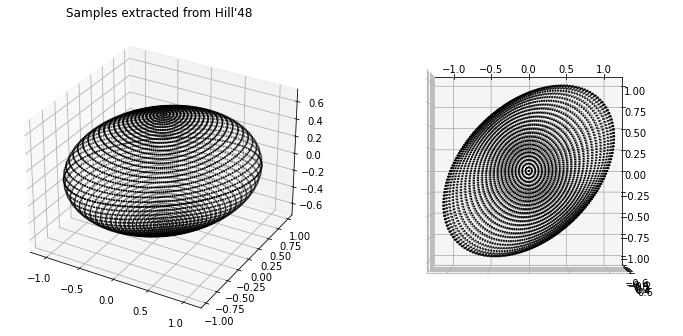

In [4]:
fg=plt.figure(figsize=(12,25))
axa=fg.add_subplot(1,2,1,projection='3d')
axa.scatter(vPoints[:,0],vPoints[:,1],vPoints[:,2],marker='o',color='k',s=1)
axa.set_title("Samples extracted from Hill'48")
axb=fg.add_subplot(1,2,2,projection='3d')
axb.scatter(vPoints[:,0],vPoints[:,1],vPoints[:,2],marker='o',color='k',s=1)
axb.azim=270;axb.elev=90
plt.show()

In [5]:
### Scramble the data and generate targets
np.random.seed(99)
pp=np.random.permutation(nPoints)
vPoints[:]=vPoints[pp[:]]
vTargets=np.ones((nPoints,1))

In [6]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""
gseed=99
np.random.seed(gseed)
random.seed(gseed)
os.environ['PYTHONHASHSEED']=str(gseed)

from keras import backend as K
if(0):
    config = tf.ConfigProto(intra_op_parallelism_threads=1,inter_op_parallelism_threads=1)
    tf.set_random_seed(gseed)
    sess = tf.Session(graph=tf.get_default_graph(), config=config)
    K.set_session(sess)
if(1):
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    tf.random.set_seed(gseed)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

2023-06-09 09:22:09.122745: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-09 09:22:09.122810: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-09 09:22:09.122838: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c2e255e1f62a): /proc/driver/nvidia/version does not exist


In [16]:
opt=keras.optimizers.RMSprop(learning_rate=0.0001)
#nun=1000
nun=600
mmval=0.8
model=keras.Sequential([
layers.Dense(nun,activation="relu",use_bias=False,
             #kernel_initializer=keras.initializers.RandomUniform(minval=-mmval, maxval=mmval, seed=gseed),
             #kernel_initializer=tf.keras.initializers.GlorotNormal(seed=gseed),
             kernel_initializer=tf.keras.initializers.GlorotUniform(seed=gseed),
             kernel_regularizer=keras.regularizers.L2(l2=1e-6)),
layers.Dense(1,use_bias=False,
             #kernel_initializer=keras.initializers.RandomUniform(minval=-mmval, maxval=mmval, seed=gseed),
             #kernel_initializer=tf.keras.initializers.GlorotNormal(seed=gseed+1),
             kernel_initializer=tf.keras.initializers.GlorotUniform(seed=gseed),
             kernel_regularizer=keras.regularizers.L2(l2=1e-6))
])
model.compile(optimizer=opt,loss=keras.losses.MeanSquaredError(),metrics=["accuracy"])    
#keras.utils.set_random_seed(99)
np.random.seed(gseed)
random.seed(gseed)
tf.random.set_seed(gseed)
history=model.fit(
vPoints,
vTargets,
epochs=300,
batch_size=16,
#batch_size=nPoints,
validation_data=()
)

Epoch 1/300
407/407 [==============================] - 1s 1ms/step - loss: 0.3607 - accuracy: 0.4169
Epoch 2/300
407/407 [==============================] - 1s 1ms/step - loss: 0.0098 - accuracy: 1.0000
Epoch 3/300
407/407 [==============================] - 1s 1ms/step - loss: 1.6746e-04 - accuracy: 1.0000
Epoch 4/300
407/407 [==============================] - 1s 1ms/step - loss: 2.0588e-05 - accuracy: 1.0000
Epoch 5/300
407/407 [==============================] - 1s 1ms/step - loss: 1.7561e-05 - accuracy: 1.0000
Epoch 6/300
407/407 [==============================] - 1s 1ms/step - loss: 1.6829e-05 - accuracy: 1.0000
Epoch 7/300
407/407 [==============================] - 1s 1ms/step - loss: 1.6491e-05 - accuracy: 1.0000
Epoch 8/300
407/407 [==============================] - 1s 1ms/step - loss: 1.6295e-05 - accuracy: 1.0000
Epoch 9/300
407/407 [==============================] - 1s 1ms/step - loss: 1.6039e-05 - accuracy: 1.0000
Epoch 10/300
407/407 [==============================] - 1s 1ms/

i =  0  sxy =  0.0
i =  1  sxy =  0.12913266227921802
i =  2  sxy =  0.19369899341882704
i =  3  sxy =  0.25826532455843604
i =  4  sxy =  0.32283165569804506
i =  5  sxy =  0.3873979868376541
i =  6  sxy =  0.45196431797726305
i =  7  sxy =  0.5165306491168721
i =  8  sxy =  0.5810969802564812
i =  9  sxy =  0.6295217286111878
i =  10  sxy =  0.6392066782821292
i =  11  sxy =  0.6443719847732979


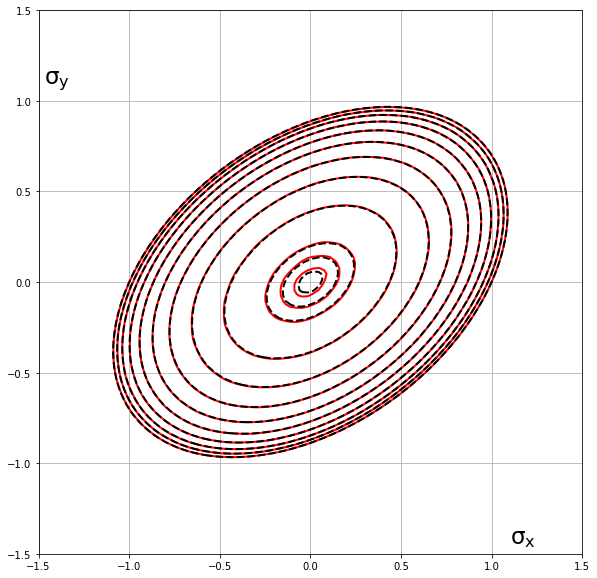

In [17]:
npt=100
vsx=np.linspace(-1.5,1.5,npt)
vsy=np.linspace(-1.5,1.5,npt)
maxSXY=1.0/np.sqrt(a3)
#vsxy=[0.0]
vsxy=maxSXY*np.array([0.0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.975,0.99,0.998])
X,Y=np.meshgrid(vsx,vsy)
X,Y=X.reshape((npt*npt,1)),Y.reshape((npt*npt,1))
vp=np.zeros((npt*npt,3))
vp[:,0]=X[:,0];vp[:,1]=Y[:,0]
fg2=plt.figure(figsize=(10,10))
ax2=fg2.add_subplot()
for ii,sxy in enumerate(vsxy):
    vp[:,2]=sxy
    vz=model(vp)
    vzHill=yut.ysHill(vp[:,0],vp[:,1],vp[:,2],a1,a2,a3)
    print('i = ',ii, ' sxy = ',sxy)
    ax2.contour(vsx,vsy,tf.reshape(vz,(npt,npt)),levels=[1.0],linewidths=2,colors=['r'])
    ax2.contour(vsx,vsy,vzHill.reshape((npt,npt)),levels=[1.0],linewidths=2,linestyles='--',colors=['k'])
    #vz2=vTerms[0]**(1.0/degree);print(np.max(vz-vz2),np.min(vz-vz2))
    #ax.contour(vsx,vsy,vz2,levels=[1.0],linewidths=1,colors=['r'])
ax2.grid()
ax2.set_aspect('equal')
y1,y2=ax2.get_ylim()
ax2.text(x=1.1,y=y1+0.02*(y2-y1),s=r'$\mathregular{\sigma_{x}}$',fontsize=23)
x1,x2=ax2.get_xlim()
ax2.text(x=x1+0.01*(x2-x1),y=1.1,s=r'$\mathregular{\sigma_{y}}$',fontsize=23)
plt.show()

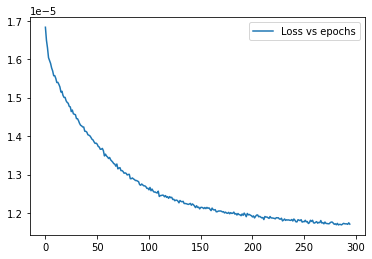

In [18]:
##print(len(history.history['loss']))
fhst=plt.figure()
ax=fhst.add_subplot()
ax.plot(history.history['loss'][5:], label='Loss vs epochs')
ax.legend()
plt.show()

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 600)               1800      
                                                                 
 dense_5 (Dense)             (None, 1)                 600       
                                                                 
Total params: 2,400
Trainable params: 2,400
Non-trainable params: 0
_________________________________________________________________


In [20]:
vw=model.get_weights()
#dir(vw)
print('number of layers: ',len(vw))
print('first layer weight matrix: ',vw[0].shape)
print('second layer weight matrix: ',vw[1].shape)

number of layers:  2
first layer weight matrix:  (3, 600)
second layer weight matrix:  (600, 1)


In [21]:
model.save_weights(wFile, overwrite=True, save_format='tf', options=None)